In [50]:
import pandas as pd
import numpy as np

#for visualisation
import seaborn as sns

#for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#for resampling
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

In [19]:
#this dataset is available at https://www.kaggle.com/datasets/utkarshx27/breast-cancer-wisconsin-diagnostic-dataset?resource=download
#import csv into a dataframe
df = pd.read_csv("brca.csv", index_col=0)
df

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,M
566,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,M
567,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,M
568,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,M


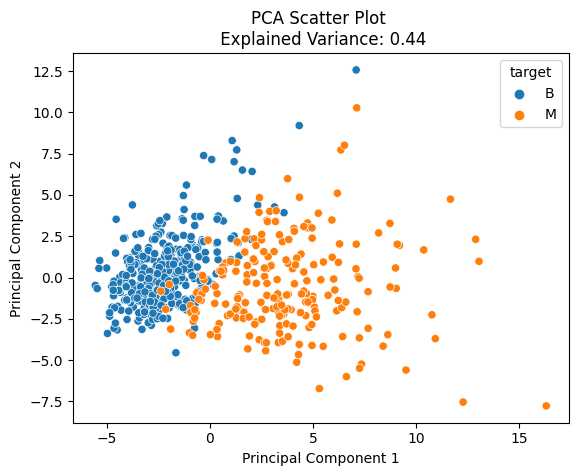

In [39]:
#check distribution of the samples

# Prepare the data
X = df.drop('y', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create an instance of PCA
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(X_scaled)

# Transform the data to its principal components
X_pca = pca.transform(X_scaled)

# Create a new DataFrame with the principal components
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

#include the target variable in the PCA DataFrame
df_pca['target'] = df['y'].values

# Create a scatter plot
sns.scatterplot(data=df_pca,x='PC1',y='PC2',hue='target')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# Display the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
plt.title(f'PCA Scatter Plot \n Explained Variance: {explained_variance_ratio[0]:.2f}')
plt.show()

#looks like this might be linearly seperable with a hyperplane

In [21]:
#check if classes are balanced
df['y'].value_counts()


B    357
M    212
Name: y, dtype: int64

In [44]:
#downsample majority class to acheive class balance
df_majority = df[df['y']=='B']
df_minority = df[df['y']=='M']

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=len(df_miniority))

# Combine minority class with downsampled majority class
df_down_sampled = pd.concat([df_majority_downsampled, df_minority])

df_down_sampled['y'].value_counts()

B    212
M    212
Name: y, dtype: int64

In [53]:
y= df_down_sampled['y']
y= y.replace(['B','M'],[0,1])
X = df_down_sampled.drop('y',axis=1)

In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM model
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = svm.predict(X_test_scaled)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        46
           1       0.97      0.97      0.97        39

    accuracy                           0.98        85
   macro avg       0.98      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85



C:\Users\Kendrick Chia\AppData\Local\Temp\ipykernel_32092\1028411829.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--',c='r')  # Random guess line


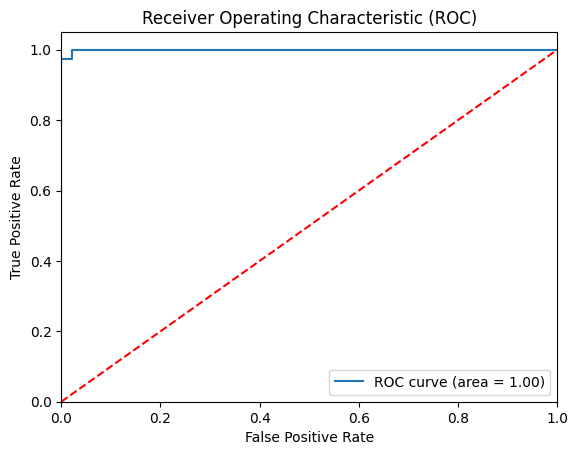

In [56]:
# Calculate the predicted probabilities for the positive class
y_pred_prob = svm.predict_proba(X_test_scaled)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the AUC (Area Under the Curve)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--',c='r')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()